In [ ]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sympy import *

## Ejemplo 1

Considere la función: 

$$f(x,y)= x^2+xy+5x+10y^2-3y$$

<br>Comenzando desde el punto inicial $(x,y)=(-3,-1)$ encuentre el mínimo valor estimado para cual esta función converge. 

In [ ]:
#declaramos la expresion de la funcion f(x,y)
x, y = symbols("x y")
funcion = x**2 + x*y + 5*x +10*y**2 - 3*y
funcion

x**2 + x*y + 5*x + 10*y**2 - 3*y

In [ ]:
#transformamos la expresión en una función de sympy
f = lambdify('x,y',funcion)

### Representación gráfica de la función

In [ ]:
#gereramos un conjunto de datos a partir de la funcion
l = 4
n = 150
linspace = np.linspace(-l,l,n) 

#
X,Y = np.meshgrid(linspace,linspace)

#
Z = f(X,Y)

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


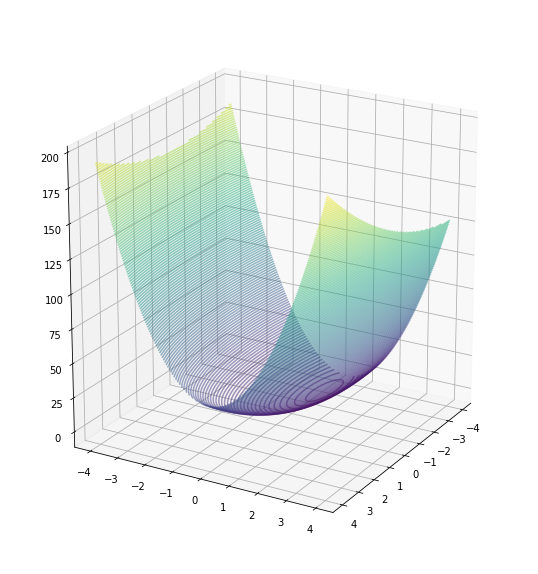

In [ ]:
#
fig = plt.figure(figsize = (15,16), tight_layout = True)
gs = GridSpec(2, 2)
ax = fig.add_subplot(gs[1,0], projection='3d')
ax.contour3D(X,Y,Z, n, alpha = .5)
ax.view_init(20, 30);

In [ ]:
f1x = funcion.diff(x)
f1xLam = lambdify('x,y',f1x)
f1y = funcion.diff(y)
f1yLam = lambdify('x,y',f1y)
f1 = [f1x,f1y]
gradiente = lambdify('x,y',f1)

In [ ]:
def gradientDescent(gradiente, punto_inicio, tamaño_paso = .085, precision = .01, max_iter = 3000, initError = 10):
    # configuracion inicial
    x,y = punto_inicio.astype(float)
    currIter, iterCoords = 0, [np.hstack([x,y])]
    error = initError
    currX = np.array([x,y])

    # inicio de las iteraciones
    
    while npl.norm(error) > precision and currIter<max_iter:
        currIter+=1 # se incrementa el contador
        prevX = currX.copy() # registra el ultimo valor de error
        
        # Gradient descent equation
        currX -= tamaño_paso * np.array(gradiente(x,y)) # New X = (last) minus (step size * function gradient(last)).
        x,y = currX[0].copy(), currX[1].copy() # Update X.
        # Gradient descent equation
        
        error = currX - prevX # Error based on how much movement new X made based on gamma and gradient.
        iterCoords.append(np.hstack([x,y])) # Track X for plotting.
        
    return currIter, currX, np.vstack(iterCoords)

In [ ]:
punto_inicio = np.vstack([-3,-1])

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


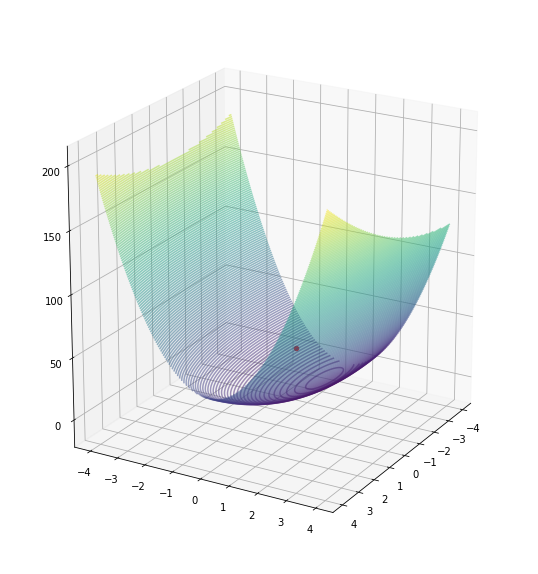

In [ ]:
#
fig = plt.figure(figsize = (15,16), tight_layout = True)
gs = GridSpec(2, 2)
ax = fig.add_subplot(gs[1,0], projection='3d')
ax.contour3D(X,Y,Z, n, alpha = .5)



ax.scatter3D(punto_inicio[0],punto_inicio[1],f(*punto_inicio), color='red')
ax.view_init(20, 30);

In [ ]:
pasos_totales, coordenada_final, coordenadas_intermedias = gradientDescent(gradiente,punto_inicio)

print(pasos_totales)
print(coordenada_final)
coordenadas_intermedias[:5]

17
[[-2.65414581]
 [ 0.28617218]]


array([[-3.        , -1.        ],
       [-2.83      ,  1.21      ],
       [-2.87675   , -0.35145   ],
       [-2.78282925,  0.74553875],
       [-2.79811907, -0.03033664]])

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


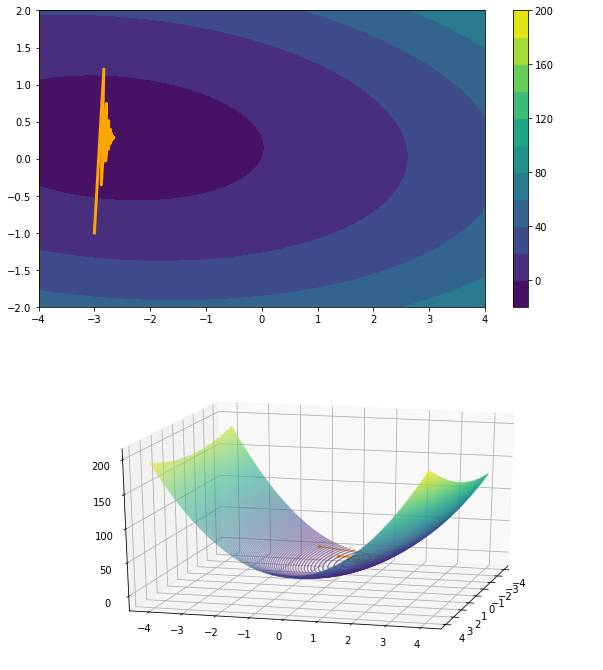

In [ ]:
fig = plt.figure(figsize=(10,12))
ax = fig.add_subplot(2, 1, 1)
plt.contourf(X,Y,Z, levels=10)
plt.colorbar()
plt.plot(coordenadas_intermedias[:,0],coordenadas_intermedias[:,1], lw = 3, c = "orange")
plt.axis([-4,4,-2,2]);


ax = fig.add_subplot(2, 1, 2, projection='3d')
ax.contour3D(X,Y,Z, n, alpha = .5)
for i in coordenadas_intermedias:
    pointTemp = i
    ax.scatter3D(pointTemp[0],pointTemp[1],f(*pointTemp),c = "orange", s = 5)

ax.plot(coordenadas_intermedias[:,0],coordenadas_intermedias[:,1],f(coordenadas_intermedias[:,0],coordenadas_intermedias[:,1]), c = "orange", lw = 1)
ax.view_init(20, 15);  

In [ ]:
pasos_totales, coordenada_final, coordenadas_intermedias = gradientDescent(gradiente,punto_inicio, tamaño_paso = 0.02)
print(pasos_totales)
print(coordenada_final)
coordenadas_intermedias[:5]

10
[[-2.83453103]
 [ 0.28504045]]


array([[-3.        , -1.        ],
       [-2.96      , -0.48      ],
       [-2.932     , -0.1688    ],
       [-2.911344  ,  0.01736   ],
       [-2.89523744,  0.12864288]])

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


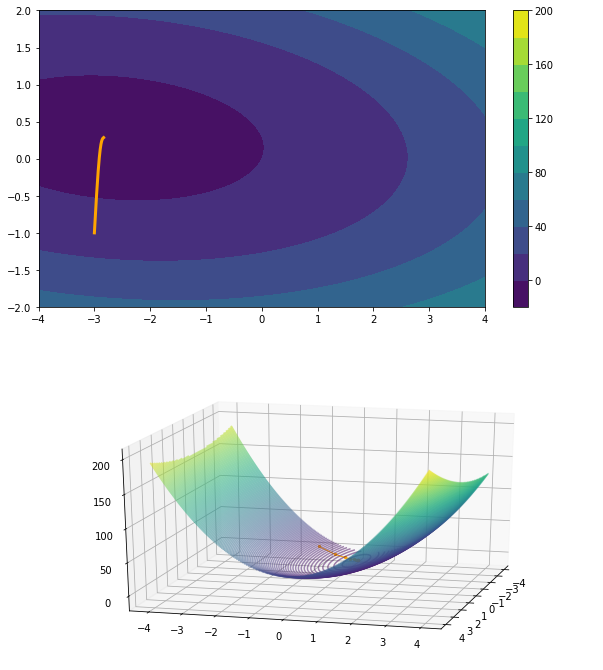

In [ ]:
fig = plt.figure(figsize=(10,12))
ax = fig.add_subplot(2, 1, 1)
plt.contourf(X,Y,Z, levels=10)
plt.colorbar()
plt.plot(coordenadas_intermedias[:,0],coordenadas_intermedias[:,1], lw = 3, c = "orange")
plt.axis([-4,4,-2,2]);


ax = fig.add_subplot(2, 1, 2, projection='3d')
ax.contour3D(X,Y,Z, n, alpha = .5)
for i in coordenadas_intermedias:
    pointTemp = i
    ax.scatter3D(pointTemp[0],pointTemp[1],f(*pointTemp),c = "orange", s = 5)

ax.plot(coordenadas_intermedias[:,0],coordenadas_intermedias[:,1],f(coordenadas_intermedias[:,0],coordenadas_intermedias[:,1]), c = "orange", lw = 1)
ax.view_init(20, 15);  